In [16]:
import warnings 

warnings.filterwarnings('ignore')

## **Import Data**

### **Exploring your working directory**

In order to import data into Python, you should first have an idea of what files are in your working directory.

IPython, which is running on DataCamp's servers, has a bunch of cool commands, including its magic commands. For example, starting a line with ! gives you complete system shell access. This means that the IPython magic command ! ls will display the contents of your current directory. Your task is to use the IPython magic command ! ls to check out the contents of your current directory and answer the following question: which of the following files is in your working directory?

In [1]:
!ls

chapter1.pdf  DataSets	Untitled.ipynb


### **Importing entire text files**

In this exercise, you'll be working with the file `moby_dick.txt`. It is a text file that contains the opening sentences of Moby Dick, one of the great American novels! Here you'll get experience opening a text file, printing its contents to the shell and, finally, closing it.

- Open the file `moby_dick.txt` as read-only and store it in the variable `file`. Make sure to pass the filename enclosed in quotation marks `''`.

In [2]:
file = open("./DataSets/moby_dick.txt", mode="r")

- Print the contents of the file to the shell using the `print()` function. As Hugo showed in the video, you'll need to apply the method `read()` to the object `file`.

In [3]:
print(file.read())

CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If th

- Check whether the file is closed by executing `print(file.closed)`.

In [4]:
print(file.closed)

False


- Close the file using the `close()` method. Check again that the file is closed as you did above.

In [7]:
file.close()
print(file.closed)

True


## **The importance of flat files in data science**

### **Importing text files line by line**

For large files, we may not want to print all of their content to the shell: you may wish to print only the first few lines. Enter the `readline()` method, which allows you to do this. When a file called `file` is open, you can print out the first line by executing `file.readline()`. If you execute the same command again, the second line will print, and so on.

In the introductory video, Hugo also introduced the concept of a **context manager**. He showed that you can bind a variable file by using a context manager construct:

> `with open('huck_finn.txt') as file:`

While still within this construct, the variable `file` will be bound to `open('huck_finn.txt')`; thus, to print the file to the shell, all the code you need to execute is:

```
with open('huck_finn.txt') as file:
    print(file.readline())
```

You'll now use these tools to print the first few lines of moby_dick.txt!

- Open `moby_dick.txt` using the `with` context manager and the variable `file`. Print the first three lines of the file to the shell by using `readline()` three times within the context manager.

In [8]:
# Read & print the first 3 lines
with open('./DataSets/moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

CHAPTER 1. Loomings.



Call me Ishmael. Some years ago--never mind how long precisely--having



### **Why we like flat files and the Zen of Python**

In PythonLand, there are currently hundreds of *Python Enhancement Proposals*, commonly referred to as PEPs. **PEP8**, for example, is a standard style guide for Python, written by our sensei Guido van Rossum himself. It is the basis for how we here at DataCamp ask our instructors to **style their code**. Another one of my favorites is **PEP20**, commonly called the *Zen of Python*. Its abstract is as follows:

> Long time Pythoneer Tim Peters succinctly channels the BDFL's guiding principles for Python's design into 20 aphorisms, only 19 of which have been written down.

If you don't know what the acronym `BDFL` stands for, I suggest that you look **here**. You can print the Zen of Python in your shell by typing `import this` into it! You're going to do this now and the 5th aphorism (line) will say something of particular interest.

The question you need to answer is: **what is the 5th aphorism of the Zen of Python?**

In [9]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## **Importing flat files using NumPy**

### **Using NumPy to import flat files**

In this exercise, you're now going to load the MNIST digit recognition dataset using the numpy function `loadtxt()` and see just how easy it can be:

- The first argument will be the filename.
- The second will be the delimiter which, in this case, is a comma.

You can find more information about the MNIST dataset here on the webpage of Yann LeCun, who is currently Director of AI Research at Facebook and Founding Director of the NYU Center for Data Science, among many other things.

- Fill in the arguments of `np.loadtxt()` by passing `file` and a comma '`,`' for the delimiter.
- Fill in the argument of `print()` to print the type of the object `digits`. Use the function `type()`.
- Execute the rest of the code to visualize one of the rows of the data.

<class 'numpy.ndarray'>


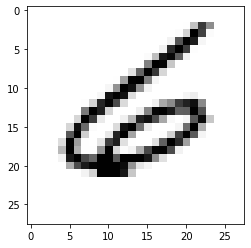

In [24]:
# Import package
import numpy as np
import matplotlib.pyplot as plt

# Assign filename to variable: file
file = './DataSets/digits.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=",")

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()


### **Customizing your NumPy import**

What if there are rows, such as a header, that you don't want to import? What if your file has a delimiter other than a comma? What if you only wish to import particular columns?

There are a number of arguments that `np.loadtxt()` takes that you'll find useful:

- `delimiter` changes the delimiter that `loadtxt()` is expecting.
- You can use '`,`' for comma-delimited.
- You can use '`\t`' for tab-delimited.
- `skiprows` allows you to specify how many rows (not indices) you wish to skip
- `usecols` takes a list of the indices of the columns you wish to keep.

The file that you'll be importing, `digits_header.txt`, has a header and is tab-delimited.

- Complete the arguments of `np.loadtxt()`: the file you're importing is tab-delimited, you want to skip the first row and you only want to import the first and third columns.
- Complete the argument of the `print()` call in order to print the entire array that you just imported.

In [13]:
# Import numpy
import numpy as np

# Assign the filename: file
file = './DataSets/digits_header.txt'

# Load the data: data
data = np.loadtxt(file, delimiter="\t", skiprows=1, usecols=[0,2])

# Print data
data.T

array([[1., 0., 1., 4., 0., 0., 7., 3., 5., 3., 8., 9., 1., 3., 3., 1.,
        2., 0., 7., 5., 8., 6., 2., 0., 2., 3., 6., 9., 9., 7., 8., 9.,
        4., 9., 2., 1., 3., 1., 1., 4., 9., 1., 4., 4., 2., 6., 3., 7.,
        7., 4., 7., 5., 1., 9., 0., 2., 2., 3., 9., 1., 1., 1., 5., 0.,
        6., 3., 4., 8., 1., 0., 3., 9., 6., 2., 6., 4., 7., 1., 4., 1.,
        5., 4., 8., 9., 2., 9., 9., 8., 9., 6., 3., 6., 4., 6., 2., 9.,
        1., 2., 0., 5.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

### **Importing different datatypes**

The file `seaslug.txt`

- has a text header, consisting of strings
- is tab-delimited.

These data consists of percentage of sea slug larvae that had metamorphosed in a given time period. 

Due to the header, if you tried to import it as-is using `np.loadtxt()`, Python would throw you a `ValueError` and tell you that it could not convert string to float. There are two ways to deal with this: firstly, you can set the data type argument dtype equal to str (for string).

Alternatively, you can skip the first row as we have seen before, using the `skiprows` argument.

- Complete the first call to `np.loadtxt()` by passing `file` as the first argument.
- Execute `print(data[0])` to print the first element of `data`.
- Complete the second call to `np.loadtxt()`. The file you're importing is tab-delimited, the datatype is `float`, and you want to skip the first row.
- Print the 10th element of `data_float` by completing the `print()` command. Be guided by the previous `print()` call.
- Execute the rest of the code to visualize the data.

['Time' 'Percent']
[0.    0.533]


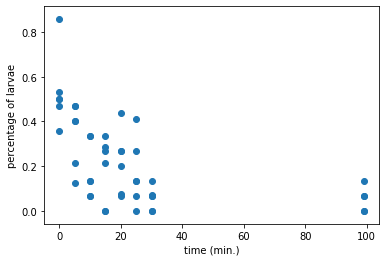

In [14]:
# Assign filename: file
file = './DataSets/seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter="\t", dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[10])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()

### **Working with mixed datatypes (1)**

Much of the time you will need to import datasets which have different datatypes in different columns; one column may contain strings and another floats, for example. The function `np.loadtxt()` will freak at this. There is another function, `np.genfromtxt()`, which can handle such structures. If we pass `dtype=None` to it, it will figure out what types each column should be.

Import `'titanic.csv'` using the function `np.genfromtxt()` as follows:

> `data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)`

Here, the first argument is the filename, the second specifies the delimiter `,` and the third argument names tells us there is a header. Because the data are of different types, data is an object called a structured array. Because numpy arrays have to contain elements that are all the same type, the structured array solves this by being a 1D array, where each element of the array is a row of the flat file imported. You can test this by checking out the array's shape in the shell by executing np.shape(data).

Accessing rows and columns of structured arrays is super-intuitive: to get the ith row, merely execute `data[i]` and to get the column with name '`Fare`', execute `data['Fare']`.

After importing the Titanic data as a structured array (as per the instructions above), print the entire column with the name Survived to the shell. What are the last 4 values of this column?

In [21]:
data = np.genfromtxt('./DataSets/titanic.csv', delimiter=',', names=True, dtype=None)
print(data["Fare"][-4:])
data["Survived"][-4:]

[30.   23.45 30.    7.75]


array([1, 0, 1, 0])

### **Working with mixed datatypes (2)**

You have just used `np.genfromtxt()` to import data containing mixed datatypes. There is also another function `np.recfromcsv()` that behaves similarly to `np.genfromtxt()`, except that its default `dtype` is `None`. In this exercise, you'll practice using this to achieve the same result.

- Import `titanic.csv` using the function `np.recfromcsv()` and assign it to the variable, `d`. You'll only need to pass `file` to it because it has the defaults `delimiter=','` and `names=True` in addition to `dtype=None!`
- Run the remaining code to print the first three entries of the resulting array `d`.

In [22]:
# Assign the filename: file
file = './DataSets/titanic.csv'

# Import file using np.recfromcsv: d
d = np.recfromcsv(file)

# Print out first three entries of d
print(d[:3])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


## **Importing flat files using pandas**

### **Using pandas to import flat files as DataFrames (1)**

In the last exercise, you were able to import flat files containing columns with different datatypes as `numpy` arrays. However, the `DataFrame` object in pandas is a more appropriate structure in which to store such data and, thankfully, we can easily import files of mixed data types as DataFrames using the pandas functions `read_csv()` and `read_table()`.

- Import the `pandas` package using the alias `pd`.
- Read `titanic.csv` into a DataFrame called `df`. The file name is already stored in the file object.
- In a `print()` call, view the `head` of the DataFrame.

In [23]:
import pandas as pd
df = pd.read_csv("./DataSets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### **Using pandas to import flat files as DataFrames (2)**

In the last exercise, you were able to import flat files into a `pandas` DataFrame. As a bonus, it is then straightforward to retrieve the corresponding `numpy` array using the attribute `values`. You'll now have a chance to do this using the MNIST dataset, which is available as `digits.csv`.

- Import the first 5 rows of the file into a DataFrame using the function `pd.read_csv()` and assign the result to `data`. You'll need to use the arguments `nrows` and `header` (there is no header in this file).
- Build a `numpy` array from the resulting DataFrame in `data` and assign to `data_array`.
- Execute `print(type(data_array))` to print the datatype of `data_array`.

In [26]:
data = pd.read_csv("./DataSets/digits.csv", nrows=5, header = None)
data_array = np.array(data)
type(data_array)

numpy.ndarray

### **Customizing your pandas import**

The `pandas` package is also great at dealing with many of the issues you will encounter when importing data as a data scientist, such as comments occurring in flat files, empty lines and missing values. Note that missing values are also commonly referred to as `NA` or `NaN`. To wrap up this chapter, you're now going to import a slightly corrupted copy of the Titanic dataset `titanic_corrupt.txt`, which

- contains comments after the character '#'
- is tab-delimited.

- Complete the `sep` (the pandas version of `delim`), `comment` and `na_values` arguments of `pd.read_csv()`. `comment` takes characters that comments occur after in the file, which in this case is '`#`'. `na_values` takes a list of strings to recognize as `NA/NaN`, in this case the string '`Nothing`'.
- Execute the rest of the code to print the head of the resulting DataFrame and plot the histogram of the '`Age`' of passengers aboard the Titanic.

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin    Embarked  
0         A/5 21171   7.2500   NaN  S #dfafdad  
1       PC 17599#to  71.2833   C85           C  
2  STON/O2. 3101282   7.9250   NaN           S  
3            113803  53.1000  C123           S  
4            373450   8.0500   NaN           S  


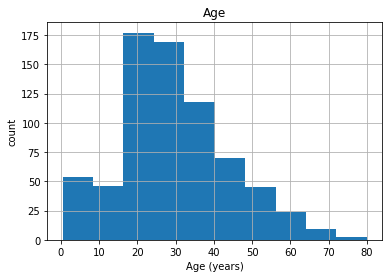

In [27]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assign filename: file
file = './DataSets/titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(file, sep="\t", comment="#", na_values="Nothing")

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()